In [1]:
import pandas as pd
import numpy as np
from glob import glob
from data_mani.visu import *
from prediction.functions import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PREDICTION_MODEL = ['lasso', 'ridge', 'enet', 'random_forest', 'lgb', 'nn3']
FS_METHODS = ['all', 'mda', 'mdi', 'sfi', 'granger', 'huang', 'IAMB','MMMB']
EVALUATION_START = '2012-07-03'
# TICKER_NAMES = ['SPX Index', 'CCMP Index', 'RTY Index', "SPX Basic Materials",
#                "SPX Communications", "SPX Consumer Cyclical", "SPX Consumer Non cyclical",
#                "SPX Energy", "SPX Financial", "SPX Industrial", "SPX Technology", "SPX Utilities"]

TICKER_NAMES = ['SPX Index', 'CCMP Index', 'RTY Index']
TITLE = 'OOS Cummulative Returns for each Feature Selection Method given a Prediction Model'
BENCHMARK_NAME = 'return'

# Aggregate prediction results

In [3]:
melt_predictions_df, melt_benchmark_df, melt_r2_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                  fs_models=FS_METHODS,
                                                                                  evaluation_start_date=EVALUATION_START,
                                                                                  ticker_names=TICKER_NAMES,
                                                                                  benchmark_name=BENCHMARK_NAME)

/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [4]:
pred_ret_df, pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=melt_predictions_df,
                                                                 target_asset_returns=melt_benchmark_df)

## R2 -  Gu, Kelly, and Xiu (2020)

In [5]:
r2_tb, agg_fs_r2_tb, agg_fore_r2_tb = plot_df_to_table(df=melt_r2_df,
                                                       index=['ticker', 'fs'],
                                                       columns=['model'],
                                                       values=['r2'],
                                                       apply_factor_to_table=100)

# Sharpe ratio

In [6]:
ret_all_df = pd.concat([pred_ret_df, melt_benchmark_df], axis=0)
pivot_ret_all_df = ret_all_df.pivot_table(index=['date'], columns=['variable', 'ticker', 'model', 'fs'], values=['value'])

In [7]:
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df,
                                                  level_to_subset='fs',
                                                  rf=.0)

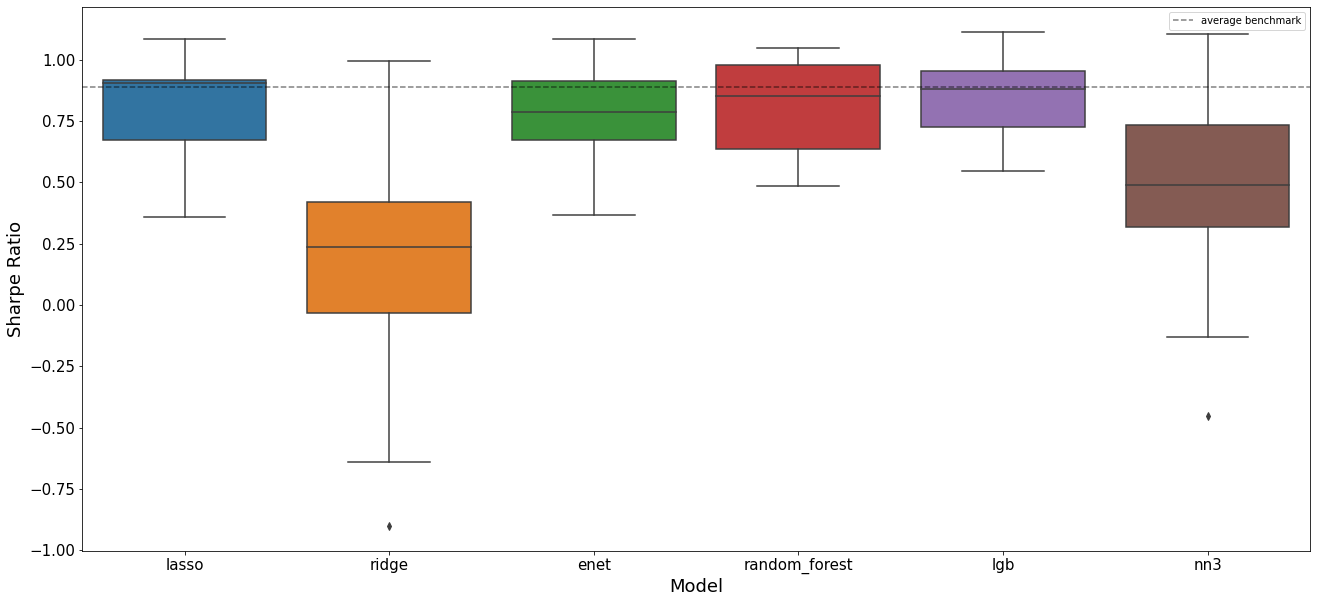

In [8]:
new = sr_rank_df.reset_index()
mean = new.loc[new['fs']=="raw"]
mean = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[["model", "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='sharpe ratio',data=new, ax=ax, order=PREDICTION_MODEL);
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Model", fontsize=18);
ax.axhline(y=mean, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");

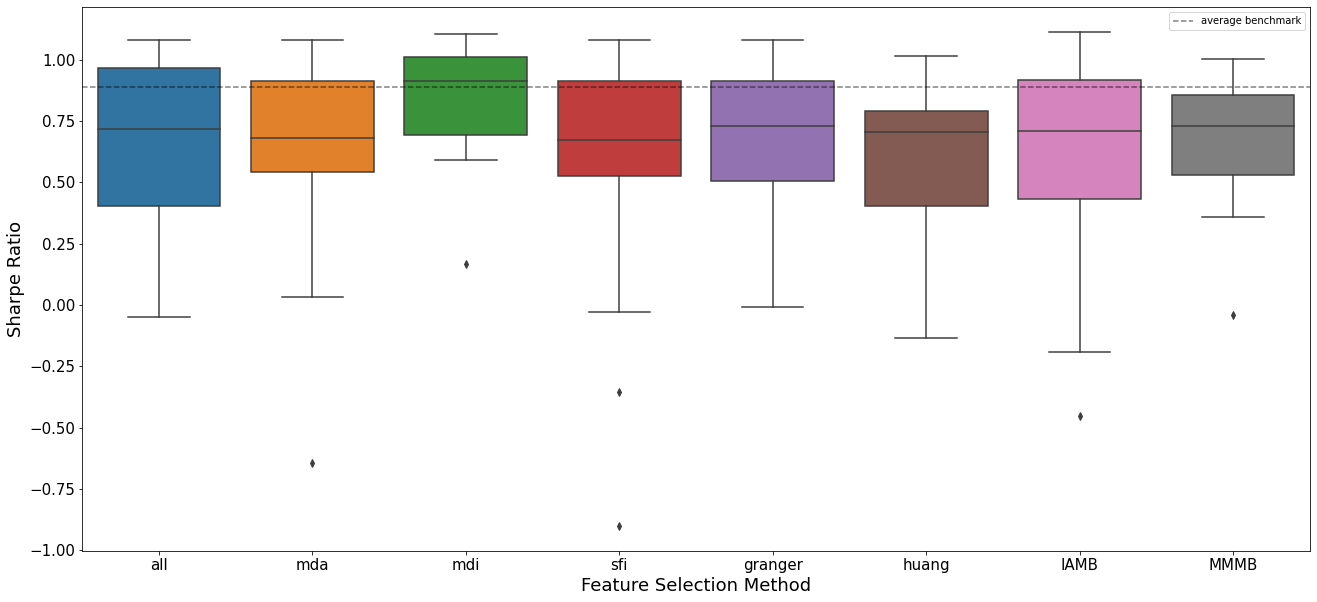

In [9]:
new = sr_rank_df.reset_index()
mean = new.loc[new['fs']=="raw"]
mean = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[['fs', "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)


fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x='fs', y='sharpe ratio',data=new, ax=ax, order=FS_METHODS);
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Feature Selection Method", fontsize=18);
ax.axhline(y=mean, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");